In [1]:
from tensorflow.keras.layers import LSTM,Input,RepeatVector,TimeDistributed,Dense,Embedding
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

2026-01-20 16:24:26.481750: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-20 16:24:26.482483: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-20 16:24:26.543719: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-20 16:24:28.129252: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
with open ("df.txt","r") as f:
    text=f.read().split(".")
print(text)

['AI redirects here', ' For other uses, see AI (disambiguation) and Artificial intelligence (disambiguation)', '\n\nArtificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making', ' It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals', '\n\nHigh-profile applications of AI include advanced web search engines (e', 'g', ', Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e', 'g', ', Google Assistant, Siri, and Alexa); autonomous vehicles (e', 'g', ', Waymo); generative and creative tools (e', 'g', ', language models and AI art); and superhuman play and analysis in strategy games (e', 'g', ', chess 

In [3]:
token=Tokenizer()
token.fit_on_texts(text)

In [4]:
sequence=token.texts_to_sequences(text)
sequence

[[2, 60, 61],
 [21, 22, 62, 63, 2, 23, 1, 8, 7, 23],
 [8,
  7,
  2,
  24,
  4,
  64,
  3,
  65,
  25,
  5,
  66,
  67,
  68,
  69,
  26,
  27,
  7,
  28,
  6,
  13,
  29,
  70,
  71,
  30,
  1,
  72,
  73],
 [74,
  24,
  9,
  31,
  3,
  14,
  10,
  75,
  76,
  15,
  77,
  1,
  78,
  32,
  1,
  79,
  15,
  80,
  81,
  5,
  82,
  33,
  83,
  1,
  34,
  13,
  1,
  7,
  5,
  84,
  85,
  15,
  86,
  33,
  87,
  3,
  88,
  89,
  16],
 [90, 91, 17, 3, 2, 35, 36, 92, 18, 93, 11],
 [12],
 [19, 18, 94, 25, 37, 38, 95, 96, 1, 97, 98, 99, 11],
 [12],
 [19, 100, 101, 1, 102, 103, 104, 11],
 [12],
 [105, 20, 1, 106, 39, 11],
 [12],
 [40, 107, 1, 2, 108, 1, 109, 110, 1, 111, 10, 112, 113, 11],
 [12],
 [114, 1, 115],
 [116,
  117,
  2,
  17,
  41,
  42,
  118,
  6,
  2,
  9,
  119,
  3,
  120,
  121,
  2,
  43,
  122,
  123,
  44,
  17,
  124,
  125,
  45,
  126,
  2,
  127,
  128,
  129,
  130,
  131,
  46,
  1,
  132,
  46,
  133,
  42,
  134,
  2,
  135],
 [136, 137, 3, 2, 14, 41, 138, 139, 47, 16,

In [5]:
max_len = max(len(seq) for seq in sequence)
max_len

39

In [6]:
sequences=pad_sequences(sequence,padding="post",maxlen=max_len)
sequences

array([[  2,  60,  61, ...,   0,   0,   0],
       [ 21,  22,  62, ...,   0,   0,   0],
       [  8,   7,   2, ...,   0,   0,   0],
       ...,
       [ 20,  58, 233, ...,   0,   0,   0],
       [241, 242,  49, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(28, 39), dtype=int32)

In [7]:
vocab_size = len(token.word_index) + 1
vocab_size

259

In [8]:
x = sequences
x

array([[  2,  60,  61, ...,   0,   0,   0],
       [ 21,  22,  62, ...,   0,   0,   0],
       [  8,   7,   2, ...,   0,   0,   0],
       ...,
       [ 20,  58, 233, ...,   0,   0,   0],
       [241, 242,  49, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(28, 39), dtype=int32)

In [9]:
encoder = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=vocab_size, output_dim=64, mask_zero=True),
    LSTM(100, return_sequences=True),
    LSTM(30)
])

E0000 00:00:1768922683.113688  425753 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1768922683.120182  425753 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
decoder = Sequential([
    Input(shape=(30,)),
    RepeatVector(max_len),
    LSTM(100, return_sequences=True),
    TimeDistributed(Dense(vocab_size, activation="softmax"))
])

In [11]:
autoencoder=Sequential([
    encoder,
    decoder
])

In [12]:
autoencoder.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy"
)

In [ ]:
autoencoder.fit(x,x,epochs=2000,batch_size=32)

Epoch 1/2000


2026-01-20 16:24:55.250345: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 5.5567
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 5.5499
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 5.5414
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 5.5299
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 5.5138
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 5.4907
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 5.4559
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 5.4020
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 5.3160
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 5.1809
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 4.9862
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 4.7416
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 4.4702
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 4.1896
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 3.9170
Epoch 16

In [14]:
pred = autoencoder.predict(x)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


array([[[1.26723852e-03, 9.64500289e-03, 4.58431721e-01, ...,
         4.10532266e-08, 2.78049628e-09, 6.73476336e-07],
        [1.34663181e-02, 6.62085488e-02, 1.33682899e-02, ...,
         1.86359414e-10, 2.47034229e-12, 1.53694550e-08],
        [8.32951590e-02, 8.02343246e-03, 1.21700141e-04, ...,
         1.49770418e-10, 9.58571655e-13, 1.66809535e-08],
        ...,
        [9.99832988e-01, 5.75418671e-05, 7.05940181e-07, ...,
         3.48398310e-10, 1.10599008e-12, 7.15717476e-08],
        [9.99832988e-01, 5.75417580e-05, 7.05941545e-07, ...,
         3.48399642e-10, 1.10599008e-12, 7.15717476e-08],
        [9.99832988e-01, 5.75416489e-05, 7.05941545e-07, ...,
         3.48400309e-10, 1.10598585e-12, 7.15716126e-08]],

       [[9.56946868e-04, 1.05359126e-02, 1.10209703e-01, ...,
         1.06036202e-06, 4.20973095e-07, 3.95979214e-06],
        [9.93965077e-04, 4.96640466e-02, 1.70591753e-02, ...,
         3.04628611e-09, 1.74952067e-10, 1.56138817e-08],
        [3.36376077e-04, 

In [15]:
pred_ids = pred.argmax(axis=-1)
pred_ids

array([[  2,  60,  61, ...,   0,   0,   0],
       [ 19,  22,  62, ...,   0,   0,   0],
       [  8,   7,  49, ...,   0,   0,   0],
       ...,
       [  4,  58, 233, ...,   0,   0,   0],
       [  8,   7,  49, ...,   0,   0,   0],
       [  8,  10,   0, ...,   0,   0,   0]], shape=(28, 39))

In [16]:
index_word = {v: k for k, v in token.word_index.items()}
index_word[0] = "<PAD>"
index_word

{1: 'and',
 2: 'ai',
 3: 'of',
 4: 'the',
 5: 'to',
 6: 'as',
 7: 'intelligence',
 8: 'artificial',
 9: 'a',
 10: 'in',
 11: 'e',
 12: 'g',
 13: 'learning',
 14: 'research',
 15: 'that',
 16: 'goals',
 17: 'applications',
 18: 'search',
 19: 'google',
 20: 'generative',
 21: 'for',
 22: 'other',
 23: 'disambiguation',
 24: 'is',
 25: 'systems',
 26: 'with',
 27: 'human',
 28: 'such',
 29: 'reasoning',
 30: 'perception',
 31: 'field',
 32: 'methods',
 33: 'their',
 34: 'use',
 35: 'include',
 36: 'advanced',
 37: 'used',
 38: 'by',
 39: 'tools',
 40: 'language',
 41: 'are',
 42: 'not',
 43: 'has',
 44: 'general',
 45: 'being',
 46: 'enough',
 47: 'particular',
 48: 'processing',
 49: 'have',
 50: 'techniques',
 51: 'neural',
 52: 'networks',
 53: 'create',
 54: 'an',
 55: 'funding',
 56: 'known',
 57: 'after',
 58: "ai's",
 59: 'about',
 60: 'redirects',
 61: 'here',
 62: 'uses',
 63: 'see',
 64: 'capability',
 65: 'computational',
 66: 'perform',
 67: 'tasks',
 68: 'typically',
 69: 'a

In [17]:
def decode_sequence(seq):
    words = []
    for idx in seq:
        if idx == 0:
            continue
        words.append(index_word.get(idx, "?"))
    return " ".join(words)

In [18]:
compression = encoder.predict(x)
compression.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


(28, 30)

In [19]:
n =20

real_sentence = decode_sequence(x[n])
reconstructed_sentence = decode_sequence(pred_ids[n])

print("REAL:        ", real_sentence)
print("---------------------------------------------------------------------------------------------------------------------------------")
print("RECONSTRUCT: ", reconstructed_sentence)

REAL:         some companies such as openai google deepmind and meta aim to create artificial general intelligence agi – ai that can complete virtually any cognitive task at least as well as a human
---------------------------------------------------------------------------------------------------------------------------------
RECONSTRUCT:  artificial intelligence such as openai google deepmind and meta aim to create artificial general intelligence agi – ai that can complete virtually any cognitive task at least as well as a human


### sentence similarity

In [40]:
pca = PCA(n_components=2, random_state=42)
compression_2D = pca.fit_transform(compression)

df = pd.DataFrame({
    "pc1": compression_2D[:, 0],
    "pc2": compression_2D[:, 1],
    "sentence": text
})

bgm = BayesianGaussianMixture(
    n_components=3,
    random_state=42
)
df["cluster"] = bgm.fit_predict(compression_2D).astype(str)
df.head()


,pc1,pc2,sentence,cluster
0,1.925479,-1.335204,AI redirects here,0
1,-0.614543,-0.718183,"For other uses, see AI (disambiguation) and A...",1
2,-1.241602,0.241661,\n\nArtificial intelligence (AI) is the capabi...,1
3,-1.483688,0.823832,It is a field of research in computer science...,1
4,-0.713539,0.189371,\n\nHigh-profile applications of AI include ad...,1


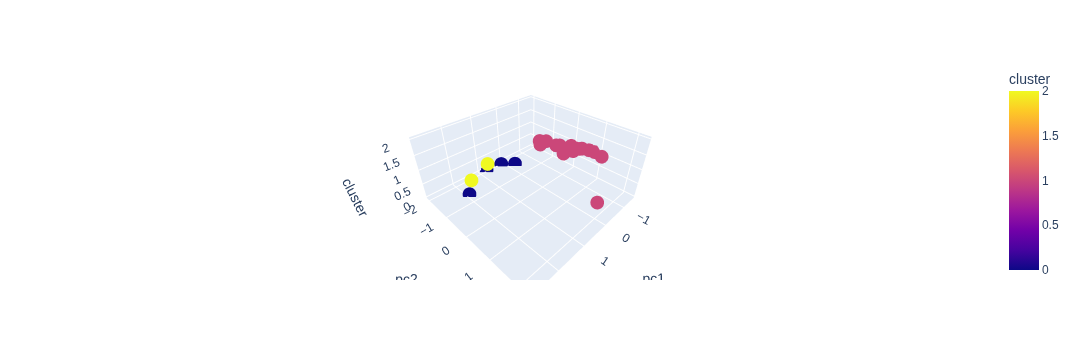

In [39]:
fig = px.scatter_3d(
    df,
    x="pc1",
    y="pc2",
    z="cluster",
    color=df["cluster"],
    hover_data=["sentence"]
)
fig.show()

In [31]:
cluster_0 = df[df["cluster"] == 0]  
cluster_0.to_csv("cluster_0.csv", index=False)  
cluster_0.head()

,pc1,pc2,sentence,cluster
0,1.925479,-1.335204,AI redirects here,0
8,0.134631,-1.937630,", Google Assistant, Siri, and Alexa); autonomo...",0
10,0.737385,-2.024710,", Waymo); generative and creative tools (e",0
23,-0.231998,-1.599215,This growth accelerated further after 2017 wit...,0


In [32]:
cluster_1 = df[df["cluster"] == 1]  
cluster_1.to_csv("cluster_1.csv", index=False)  
cluster_1.head()

,pc1,pc2,sentence,cluster
1,-0.614543,-0.718183,"For other uses, see AI (disambiguation) and A...",1
2,-1.241602,0.241661,\n\nArtificial intelligence (AI) is the capabi...,1
3,-1.483688,0.823832,It is a field of research in computer science...,1
4,-0.713539,0.189371,\n\nHigh-profile applications of AI include ad...,1
6,-0.924133,-0.739117,", Google Search); recommendation systems (used...",1


In [33]:
cluster_2 = df[df["cluster"] == 2]  
cluster_2.to_csv("cluster_2.csv", index=False)  
cluster_2.head()

,pc1,pc2,sentence,cluster
5,2.799489,0.477559,g,2
7,2.799489,0.477559,g,2
9,2.799489,0.477559,g,2
11,2.799489,0.477559,g,2
13,2.799489,0.477559,g,2
